In [1]:
import sympy
from sympy import Eq, S, Matrix, symbols, Symbol, simplify, expand, collect, latex
from sympy import solve, solveset, zeros, ones
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.plotting.plot import plot3d
import matplotlib.pyplot as plt
from IPython.display import Latex

# Практическое занятие 16
# Компьютерный практикум по алгебре на Python
## Поверхности второго порядка
### Задание 1.
Составить в матричном виде двумя способами уравнение поверхности второго порядка $4x^2-24xy+8\sqrt3 xz-7y^2+10\sqrt3 yz+3z^2-4 = 0$. Привести уравнение поверхности второго порядка к каноническому виду с помощью перехода к новому базису. Вывести на экран каноническое уравнение.

In [2]:
from sympy.abc import x, y, z
A1 = Matrix(((4, -12, 4*3**S.Half),
            (-12, -7, 5*3**S.Half),
            (4*3**S.Half, 5*3**S.Half, 3)))
b1 = Matrix((0, 0, 0)).T
c1 = 4
X = Matrix((x, y, z))
u1 = X.T * A1 * X
v1 = b1 * X
display(Latex(f'A = {latex(A1)},\\\\X^TAX = {latex(u1)},\\\\bX = {latex(v1)}'))
expr1 = (u1[0] + 2 * v1[0] + c1).expand().simplify()
display(Latex(f'Уравнение\ поверхности:\ {latex(Eq(expr1, 0))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
A1_new = A1.row_join(b1.T).col_join(b1.row_join(Matrix((c1,))))
display(Latex(f'A_{{new}} = {latex(A1_new)}'))
X1 = X.col_join(Matrix((1,)))
expr2 = (X1.T * A1_new * X1)[0].expand().simplify()
display(Latex(f'Уравнение\ поверхности:\ {latex(Eq(expr2, 0))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Перенесем свободный член в правую часть и поделим обе части на свободный член с противоположным знаком.

In [ ]:
eq1 = Eq((X.T * A1 * X)[0].expand().simplify() - c1, 0)
display(Latex(f'A = {latex(A1)}\\\\уравнение\ поверхности:\ {latex(eq1)}'))
P = Matrix([])
for item in A1.eigenvects():
    multiplicity = item[1]
    for i in range(multiplicity):
        P = P.row_join(item[2][i].normalized()) 
A1_new = P.T*A1*P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
q_f1 = (X_new.T * A1_new * X_new)[0].expand().simplify()
display(Latex(f'A_{{new}} = {latex(A1_new)}\\\\квадратичная\ форма:\ {latex(q_f1)}'))
eq1_new = Eq(q_f1 / c1, 1)
display(eq1_new)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Eq(-5*x1**2 + 2*y1**2 + 3*z1**2, 1)

Получился **однополостной гиперболоид**.

### Задание 2.
Привести уравнение поверхности второго порядка $24 x^{2} - 4 \sqrt{2} x y - 4 \sqrt{2} x z + 18 y^{2} + 12 y z + 18 z^{2} - 4 = 0$ к каноническому виду. Построить график.

In [6]:
A2 = Matrix(((24, -2*2**S.Half, -2*2**S.Half),
            (-2*2**S.Half, 18, 6),
            (-2*2**S.Half, 6, 18)))
c2 = 4
X = Matrix((x, y, z))
eq2 = Eq((X.T * A2 * X)[0].expand().simplify() - c2, 0)
display(Latex(f'A = {latex(A2)}\\\\уравнение\ поверхности:\ {latex(eq2)}'))
P = Matrix([])
for item in A2.eigenvects():
    multiplicity = item[1]
    for i in range(multiplicity):
        P = P.row_join(item[2][i].normalized()) 
A2_new = P.T*A2*P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
q_f2 = (X_new.T * A2_new * X_new)[0].expand().simplify()
display(Latex(f'A_{{new}} = {latex(A2_new)}\\\\квадратичная\ форма:\ {latex(q_f2)}'))
eq2_new = Eq(q_f2 / c2, 1)
display(eq2_new)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Eq(3*x1**2 + 5*y1**2 + 7*z1**2, 1)

<IPython.core.display.Latex object>

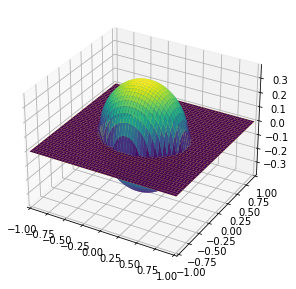

In [ ]:
Z = solve(eq2_new, z1) 
display(Latex('z_1 = {0}\\\\z_2 = {1}'.format(*map(latex, Z))))
plot3d(*Z, (x1, -1, 1), (y1, -1, 1))

### Задание 3.
Привести уравнение поверхности второго порядка $x^2 + y^2 + 2x - 4y + 2z + 1 = 0$ к каноническому виду. Построить график.

In [20]:
A3 = Matrix(((1, 0, 0), (0, 1, 0), (0, 0, 0)))
b3 = Matrix((1, -2, 1)).T
c3 = -1
X3 = Matrix((x, y, z))
u3 = X.T * A3 * X
v3 = b3 * X
expr3 = (u3[0] + 2 * v3[0] - c3).expand().simplify()

c_new = c3
for i in range(2):
    c_new -= b3[i] ** 2 / (A3[i, i])
    b3[i] = 0
X3_last = Matrix((x1, y1, z1))
expr3_new = (X3_last.T * A3 * X3_last)[0] +  2 * (b3 * X)[0] + c_new
display(Eq(expr3_new, 0))
expr3_new = expr3_new.subs(z, z1 - c_new/(2*b3[2]))
display(Latex(f'Уравнение\ поверхности:\ {latex(Eq(expr3_new, 0))}'))
eq3 = Eq(solve(expr3_new, z1)[0]*2, 2*z1)
display(eq3)

Eq(x1**2 + y1**2 + 2*z - 6, 0)

<IPython.core.display.Latex object>

Eq(-x1**2 - y1**2, 2*z1)

*Получился* **эллиптический параболоид**. 
Чтобы поучить каноническое уравнение, достаточно провести замену переменной, избавляющую от свободного члена:

<IPython.core.display.Latex object>

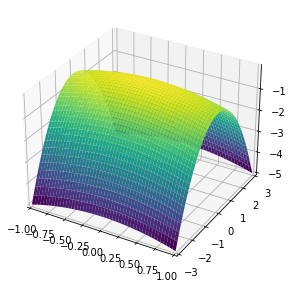

In [21]:
Z = solve(eq3, z1) 
display(Latex('z_1 = {0}'.format(*map(latex, Z))))
plot3d(Z[0], (x1, -1, 1), (y1, -3, 3))

### Индивидуальное задание.
Привести уравнение поверхности второго порядка к каноническому виду. Построить график.

$$2624 x^{2} - 60 \sqrt{11} x y + 876 \sqrt{21} x z + 475 y^{2} + 30 \sqrt{231} y z - 1099 z^{2} + 500 = 0$$

In [ ]:
A0 = Matrix(((2624, -30*11**S.Half, 438*21**S.Half),
            (-30*11**S.Half, 475, 15*231**S.Half),
            (438*21**S.Half, 15*231**S.Half, -1099)))
c0 = -500
X = Matrix((x, y, z))
eq0 = Eq((X.T * A0 * X)[0].expand().simplify() - c0, 0)
display(Latex(f'A = {latex(A0)}\\\\уравнение\ поверхности:\ {latex(eq0)}'))
P = Matrix([])
for item in A0.eigenvects():
    multiplicity = item[1]
    for i in range(multiplicity):
        P = P.row_join(item[2][i].normalized()) 
A0_new = P.T*A0*P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
q_f0 = (X_new.T * A0_new * X_new)[0].expand().simplify()
display(Latex(f'A_{{new}} = {latex(A0_new)}\\\\квадратичная\ форма:\ {latex(q_f0)}'))
eq0_new = Eq(-q_f0 / c0, -1)
display(eq0_new)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Eq(-4*x1**2 + y1**2 + 7*z1**2, -1)

Получился **двуполостной гиперболоид**.

<IPython.core.display.Latex object>

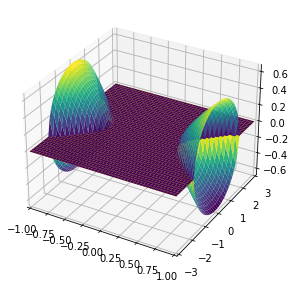

In [ ]:
Z = solve(eq0_new, z1) 
display(Latex('z_1 = {0}\\\\z_2 = {1}'.format(*map(latex, Z))))
plot3d(*Z, (x1, -1, 1), (y1, -3, 3))